# Bank Marketing:
## Introduction:
The data is related with direct marketing campaigns of a Portuguese banking institution.

The marketing campaigns were based on phone calls Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

With the provided dataset we are trying to analysis and predict if the clients after marketing campaign will subscribe to term deposit or not.

Portuguese banking institution is the client, it will help them to analyze

1. whether their marketing campaign is success,
2. what other methods or changes they can do to improve in the campaign
3. What's the effectiveness of the campaign and points to continue from their last campaign
4. Whether they are targeting the right set of audience.

My analysis will help them to make a decision as to how to improve their campaigns so that they can achieve more clients subscribing to their term deposit.

## Information on dataset:
Bank Marketing Data Set: https://archive.ics.uci.edu/ml/datasets/bank+marketing

We are using below datasets for our analysis

bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

And below are the key attributes

* Job
* Education
* Default which gives if the have any default credit or not
* housing
* loan
* previous outcome of campaign
* whether client has subscribed to term deposit or not.

## Limitations on dataset:
The given dataset has limited amount of data present regarding previous campaign outcome, so its difficult to determine if the previous campaign is successful or not with small sample of data.

## Data cleaning and Wrangling:
Data cleaning was done on the dataset - to replace all null and missing fields with unknown. 
The data was present in csv format, using panda's read_csv function we were able to get the dataframe

We used the two datasets with information for our analysis.

## Observations based on preliminary exploration:
Here is the link to data analysis - https://github.com/SoundaryaViji/capstone_project/blob/master/BankDetails.ipynb with a single set of data


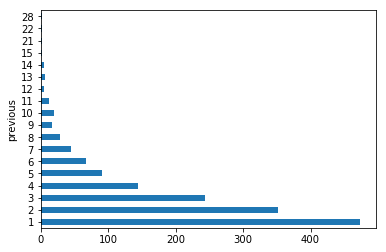

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections

df = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstoneproject/bank/bank-full.csv',delimiter=";")

df.loc[df["poutcome"] == 'success','previous'].groupby(df['previous']).size().plot(kind = 'barh')



Distribution of clients who have subscribed to term deposit displayed based on the age.
From the below graph we can see clients between the age of 28 to 36 who are the majors ones who have subscribed to term deposit

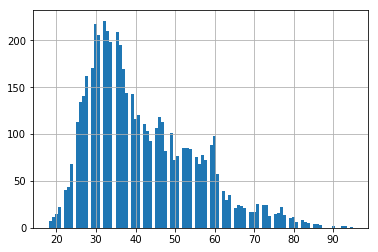

In [2]:
df['res'] = df.loc[df['y'] == 'yes', 'age']
df['res'].hist(bins = 100)

Graph which shows clients who have subscribed to term deposit and their job categories
From the below information the clients in management jobs seem to be subscribing to term deposit then other categories
Top three jobs for which term deposit are larger are Management, Technician,blue-collar jobs

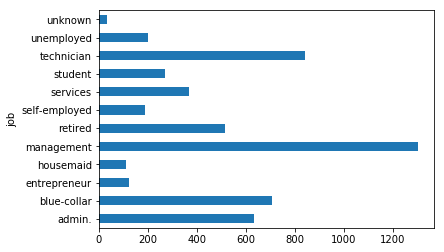

In [3]:

df.loc[df['y'] == 'yes','job'].groupby(df['job']).size().plot(kind = 'barh')


In [4]:
df12 = df.loc[df['y'] == 'yes'].groupby(["month"]).size().reset_index()
df12.columns = ["month","size"]

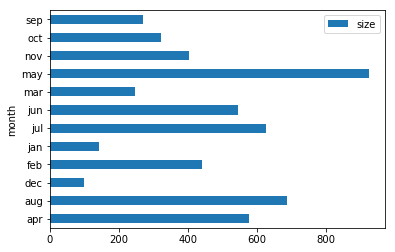

In [5]:
df12.plot(kind='barh',x = 'month',y = 'size')

Month of may has largest number of customers who have subscribed for term despoist, even though the fiscal year in portugal is from jan to dec the term deposit seems to be more on month of May.

## Inference from data analysis

1. From the given data we can observe that the clients who have management jobs with secondary degree and who doesnt have any loans and in between age of 27 to 37 are the ones who have subscribed to term deposit the most.

2. Protugal has fiscal year from January to December and we expected the term deposit to be more during these months but it turned out that during month of May there are more number of clients subscribing to term deposit. It may be due to performance apparisal cycle or bonus pay cycle but we dont have substantial information to confirm this theory.

3. We have around 18 percent of clients who have subscribed to term deposit after pervious campaign and current campaign.

4. From the campaign results  its clear that unemployed clients are not susbcribing to term deposit.Students contribute to very low percentage of clients who subscribed to term deposit.

5. From our initail analysis clients who are married and who have management/blue collar and those who are finanically stable are the clients who subscribe for term deposit.

6. With the given data we can find that for a successful campaign the category of clients we need to contact and  for category of clients are not subscribing.

7. This gives us the areas which we need to improve for making more clients to subscribe to term deposit.

## Approach:
The inital exploration has been useful to understand trends in the data. The the main goal of the project to create a predictive model which can predict if the clients will subscribed to term deposit.

We will use supervised training with classification to predict the clients subscription

After analizing the data we decided to use predict analysis to predict if clients will subscribed to given term deposit

I am using the below model for test and train set to predicted the values for clients subscription
1. Logistic regression
2. Decision Tree
3. SVM
4. Random Forest

We going to take two set of data's. 
1. 70-30 train and test split for which attributes are selected using feature selection
2. 80-20 split with attributes selected from ridgecv.

In [24]:
from IPython.display import HTML
from IPython.display import display
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LogisticRegression, RandomizedLogisticRegression)
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
data = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstone_project/data/bank-full.csv',delimiter=";")
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in selectedcols:
    catlist='var'+'_'+var
    catlist = pd.get_dummies(data[var], prefix=var)
    data1=data.join(catlist)
    data=data1
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in selectedcols]
data_final=data[to_keep]
data_final['y'] = data_final['y'].map({'yes': 1, 'no': 0})
data_final_vars=list(data_final.columns.values)
Y = ['y']
X=[i for i in data_final_vars if i not in Y]
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Using LassoCV and RidgeCV to estimate cooeficient of the attributes. The values greather than zero indicates feature importance
LassoCV is unstable in a similar way as unregularized linear models are meaning that the coefficients (and thus feature ranks) can vary significantly even on small data changes when there are correlated features in the data. 
So we will use RidgeCV which is L2 regularization.

In [9]:
cols=['job_student','housing_yes','loan_yes','contact_unknown','month_aug', 'month_dec', 'month_feb','month_jan', 'month_jul','month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success','poutcome_unknown'] 
X1=data_final[cols]
Y1=data_final['y']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
display(tag)

In [10]:
X2 = data_final[X]
Y2 = data_final[Y]
x_train0, x_test0, y_train0, y_test0 = train_test_split(X2, Y2,test_size =0.3)
model_dt = DecisionTreeClassifier(max_depth = 810, criterion ="gini")
model_dt.fit(x_train0, y_train0)
y_pred_dt0 = model_dt.predict_proba(x_test0)[:, 1]
fpr_dt, tpr_dt,_ = roc_curve(y_test0, y_pred_dt0)
roc_auc_dt = auc(fpr_dt, tpr_dt)
display(tag)

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, Y2,test_size =0.3)
model_bayes = svm.SVC()

model_bayes.fit(x_train1, y_train1)
pred_bayes = model_bayes.fit(x_train1, y_train1)
y_pred_bayes = pred_bayes.decision_function(x_test1)
fprbayes, tprbayes, _= roc_curve(y_test1, y_pred_bayes)
roc_auc_bayes = auc(fprbayes, tprbayes)
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2,test_size =0.3)
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 150)
model_pred = model_rf.fit(x_train2, y_train2)
y_pred_rf = model_rf.predict_proba(x_test2)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


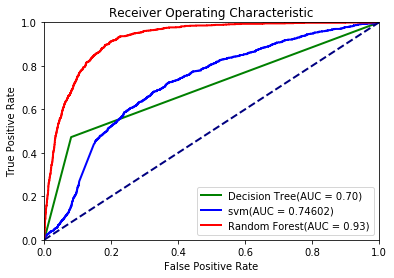

In [25]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
display(tag)

* Logistic - Accuracy of logistic regression classifier on test set: 0.89
* Precision score for logistic regression classifier 0.60
* Decision - Precision score for Decision Tree 0.48 
* SVM - Precision score for SVM 0.33
* Random Forest - Precision score for Random forest 0.79

From the precision score its clear that Random forest has the highest score compared to other classification techniques. And Accuracy of logistic regression is higher and closer to 1


For predicting if a client will subscribe to term deposit or not, the main point to consider while evaluating our models is recall score. Since the number of false negatives and true negatives are important.

Below list the recall score and confusion matrix for all the 4 models which we used to do our predictive analysis

In [14]:
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, lreg.predict(X_test))))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test1,pred_bayes.predict(x_test1))))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test2,model_pred.predict(x_test2))))

Recall score for logistic regression classifier 0.19
Recall score for Decision Tree 0.47 
Recall score for SVM 0.00
Recall score for Random forest 0.18


In [15]:
print("Confusion matrix \n TP FN\n")
print (" FP TN ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test, y_pred))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, pred_bayes.predict(x_test1)))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2, model_pred.predict(x_test2)))


Confusion matrix 
 TP FN

 FP TN 
Confusion Matrix for Logistic regression 
 [[11774   195]
 [ 1289   306]]
Confusion Matrix for Decision Tree 
 [[11114   863]
 [  849   738]]
Confusion Matrix for SVM 
 [[11956     1]
 [ 1606     1]]
Confusion Matrix for Random forest 
  [[11869   109]
 [ 1293   293]]


From the above confusion matrix, 
* Decision tree have the largest number of FN and TN, and high recall score - its clear that decision tree is not best model for our predictive analysis.

* SVM has low number of FN and TN but its catergoizing all the values into True positive and false positive and not taking clear consideration about the negatives. So its not a ideal model for our problem

* Logistic Regression and Random forest seems to have lower recall score and lower number of false negatives. From our analysis of confusion matrix its clear that random forest seems to be best suited approach.


In [16]:
cols1 =['age','balance','day','duration','previous','job_admin.','job_retired','job_student','job_unemployed','marital_divorced','marital_single','education_tertiary','education_unknown','default_no','housing_no','loan_no','contact_cellular','contact_telephone','month_apr','month_dec','month_feb','month_jun','month_mar','month_oct','month_sep','poutcome_success']
X3=data_final[cols1]
Y3=data_final['y']
display(tag)

In [17]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train3, y_train3)
y_pred3 = logreg.predict(X_test3)
display(tag)

In [18]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X3, Y3,test_size =0.2)
model_dt = DecisionTreeClassifier(max_depth = 810, criterion ="gini")
model_dt.fit(x_train4, y_train4)
y_pred_dt4 = model_dt.predict_proba(x_test4)[:, 1]
fpr_dt, tpr_dt,_ = roc_curve(y_test4, y_pred_dt4)
roc_auc_dt1 = auc(fpr_dt, tpr_dt)
display(tag)

In [19]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X3, Y3,test_size =0.2)
model_bayes = svm.SVC()

model_bayes.fit(x_train5, y_train5)
pred_bayes = model_bayes.fit(x_train5, y_train5)
y_pred_bayes5 = pred_bayes.decision_function(x_test5)
fprbayes, tprbayes, _= roc_curve(y_test5, y_pred_bayes5)
roc_auc_bayes2 = auc(fprbayes, tprbayes)
display(tag)

In [20]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X3, Y3,test_size =0.2)
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 150)
model_pred = model_rf.fit(x_train6, y_train6)
y_pred_rf6 = model_rf.predict_proba(x_test6)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test6, y_pred_rf6)
roc_auc_rf3 = auc(fpr_rf, tpr_rf)
display(tag)

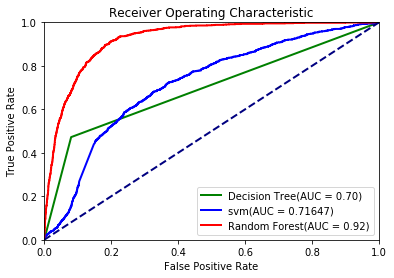

In [26]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt1)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes2)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
display(tag)

In [22]:
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test3, y_pred3)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test4, y_pred_dt4)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test5,pred_bayes.predict(x_test5))))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test6,model_pred.predict(x_test6))))

Recall score for logistic regression classifier 0.35
Recall score for Decision Tree 0.47 
Recall score for SVM 0.00
Recall score for Random forest 0.25


In [23]:
print("Confusion matrix with 80-20 \n TP FN\n")
print (" FP TN ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test3, y_pred3))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test4, y_pred_dt4))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test5, pred_bayes.predict(x_test5)))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test6, model_pred.predict(x_test6)))

Confusion matrix with 80-20 
 TP FN

 FP TN 
Confusion Matrix for Logistic regression 
 [[7751  229]
 [ 691  372]]
Confusion Matrix for Decision Tree 
 [[7371  645]
 [ 542  485]]
Confusion Matrix for SVM 
 [[7984    0]
 [1057    2]]
Confusion Matrix for Random forest 
  [[7902  103]
 [ 778  260]]


Similar to our 70-30 split our 80-20% train and test split follows the same hypothesis.

From the above confusion matrix, 
1. Decision tree have the largest number of FN and TN, and high recall score - its clear that decision tree is not best model for our predictive analysis.

2. SVM has low number of FN and TN but its catergoizing all the values into True positive and false positive and not taking clear consideration about the negatives. So its not a ideal model for our problem

3. Logistic Regression and Random forest seems to have lower recall score and lower number of false negatives. From our analysis of confusion matrix its clear that random forest seems to be best suited approach.
